In [28]:
import pandas as pd
import matplotlib.pyplot as plt

In [29]:
df = pd.read_excel("Base Geral _ Pesquisa de Clima Cada Voz Importa.xlsx")
df.head()

,Unnamed: 0,Unnamed: 1,CONFIANCA,CONFIANCA.1,CONFIANCA.2,CONFIANCA.3,CONFIANCA.4,CONFIANCA.5,CONFIANCA.6,RESPEITO,...,ORGULHO.4,ORGULHO.5,ORGULHO.6,CAMARADAGEM,CAMARADAGEM.1,CAMARADAGEM.2,CAMARADAGEM.3,CAMARADAGEM.4,CAMARADAGEM.5,CAMARADAGEM.6
0,Carimbo de data/hora,A QUAL ÁREA VOCÊ FAZ PARTE?,1/7 DIMENSÃO CONFIANCA: Seu líder direto conf...,2/7 DIMENSÃO CONFIANCA: Seu líder compartilha ...,3/7 DIMENSÃO CONFIANCA: Você sente que seu líd...,4/7 DIMENSÃO CONFIANCA: Seu líder sabe organi...,5/7 DIMENSÃO CONFIANCA: Você recebe as ferrame...,6/7 DIMENSÃO CONFIANCA: Seu líder toma decisõ...,7/7 DIMENSÃO CONFIANCA: Seu líder está dispon...,1/7 RESPEITO: Seu líder envolve você nas deci...,...,5/7 ORGULHO: Você recomendaria o Instituto De...,6/7 ORGULHO: Você sente que o Instituto faz a...,7/7 ORGULHO: O sucesso do Instituto te faz se...,1/7CAMARADAGEM: As pessoas aqui no Instituto s...,2/7CAMARADAGEM: Você sente que o time colabora...,3/7CAMARADAGEM: Dá para contar com seus colega...,4/7CAMARADAGEM: Existe um senso de união e pa...,5/7CAMARADAGEM: Você sente que pode ser quem v...,6/7CAMARADAGEM: O time trabalha junto de form...,7/7CAMARADAGEM: O Instituto promove atividade...
1,2024-10-28 16:00:16,RH,5,5,5,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5
2,2024-10-28 16:20:25,DIRETORIA,4,5,5,5,3,5,5,5,...,5,5,5,4,4,4,4,4,5,5
3,2024-10-28 16:23:12,CS,3,4,4,4,3,4,5,4,...,4,5,5,4,4,4,3,2,4,4
4,2024-10-28 16:25:57,COMERCIAL,5,4,3,3,4,3,5,3,...,4,5,5,2,2,2,2,3,1,2


In [30]:
# Filtrando os dados para remover a área "A QUAL ÁREA VOCÊ FAZ PARTE?"
df_filtrado = df[df['Unnamed: 1'] != 'A QUAL ÁREA VOCÊ FAZ PARTE?']

# Definir as colunas para cada dimensão
dimensoes = {
    'CONFIANCA': [col for col in df.columns if 'CONFIANCA' in col],
    'RESPEITO': [col for col in df.columns if 'RESPEITO' in col],
    'IMPARCIALIDADE': [col for col in df.columns if 'IMPARCIALIDADE' in col],
    'ORGULHO': [col for col in df.columns if 'ORGULHO' in col],
    'CAMARADAGEM': [col for col in df.columns if 'CAMARADAGEM' in col]
}

# Função para calcular a favorabilidade
def calcular_favorabilidade(colunas):
    # Converter as colunas para tipo numérico, ignorando erros
    df_num = df_filtrado[colunas].apply(pd.to_numeric, errors='coerce')
    total_respostas = df_num.count().sum()  # Total de respostas válidas
    respostas_favoraveis = (df_num >= 4).sum().sum()  # Contagem de respostas 4 e 5
    return (respostas_favoraveis / total_respostas) * 100 if total_respostas else 0

# Calcular e exibir a favorabilidade para cada dimensão
favorabilidade = {dimensao: calcular_favorabilidade(cols) for dimensao, cols in dimensoes.items()}

# Exibir os resultados
print("Percentual de Favorabilidade por Dimensão:")
for dimensao, percentual in favorabilidade.items():
    print(f"{dimensao}: {percentual:.2f}%")


Percentual de Favorabilidade por Dimensão:
CONFIANCA: 86.04%
RESPEITO: 80.52%
IMPARCIALIDADE: 72.08%
ORGULHO: 97.08%
CAMARADAGEM: 78.57%


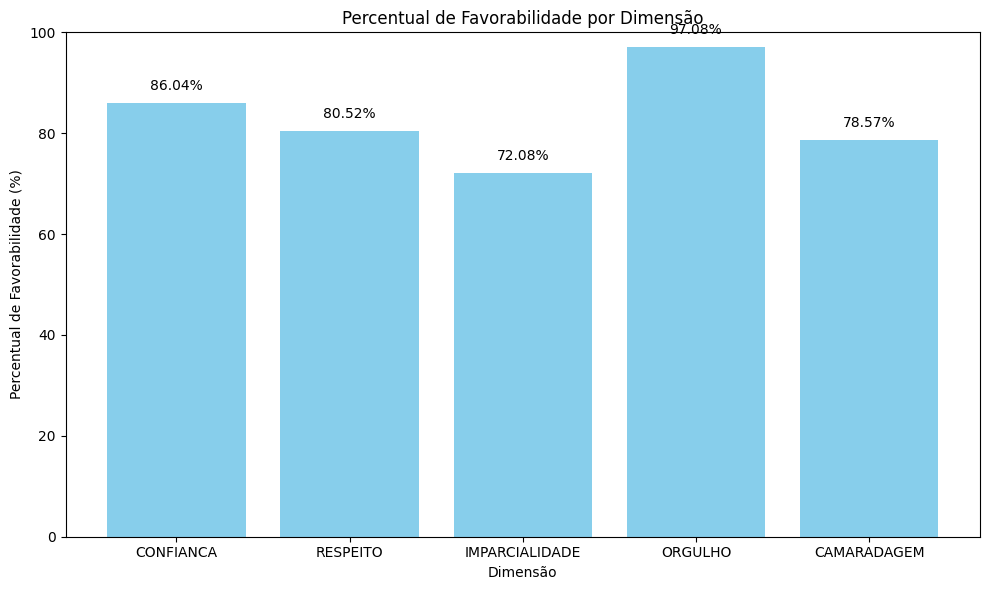

In [31]:
# Plotar o gráfico de favorabilidade por dimensão
plt.figure(figsize=(10, 6))
plt.bar(favorabilidade.keys(), favorabilidade.values(), color='skyblue')
plt.title('Percentual de Favorabilidade por Dimensão')
plt.xlabel('Dimensão')
plt.ylabel('Percentual de Favorabilidade (%)')
plt.ylim(0, 100)  # Definindo o limite do eixo Y entre 0 e 100

# Adicionar os valores no topo das barras
for i, v in enumerate(favorabilidade.values()):
    plt.text(i, v + 2, f'{v:.2f}%', ha='center', va='bottom')

plt.tight_layout()  # Ajustar o layout para melhor visualização
plt.show()

In [32]:
# Verifique os nomes das colunas no DataFrame
print(df.columns)


Index(['Unnamed: 0', 'Unnamed: 1', 'CONFIANCA', 'CONFIANCA.1', 'CONFIANCA.2',
       'CONFIANCA.3', 'CONFIANCA.4', 'CONFIANCA.5', 'CONFIANCA.6', 'RESPEITO',
       'RESPEITO.1', 'RESPEITO.2', 'RESPEITO.3', 'RESPEITO.4', 'RESPEITO.5',
       'RESPEITO.6', 'IMPARCIALIDADE', 'IMPARCIALIDADE.1', 'IMPARCIALIDADE.2',
       'IMPARCIALIDADE.3', 'IMPARCIALIDADE.4', 'IMPARCIALIDADE.5',
       'IMPARCIALIDADE.6', 'ORGULHO', 'ORGULHO.1', 'ORGULHO.2', 'ORGULHO.3',
       'ORGULHO.4', 'ORGULHO.5', 'ORGULHO.6', 'CAMARADAGEM', 'CAMARADAGEM.1',
       'CAMARADAGEM.2', 'CAMARADAGEM.3', 'CAMARADAGEM.4', 'CAMARADAGEM.5',
       'CAMARADAGEM.6'],
      dtype='object')


In [33]:
# Definir o nome da coluna para a área
coluna_area = 'Unnamed: 1'  # Substitua por 'Área' ou outro nome correto se necessário

# Definir as colunas para cada dimensão
dimensoes = {
    'CONFIANCA': [col for col in df.columns if 'CONFIANCA' in col],
    'RESPEITO': [col for col in df.columns if 'RESPEITO' in col],
    'IMPARCIALIDADE': [col for col in df.columns if 'IMPARCIALIDADE' in col],
    'ORGULHO': [col for col in df.columns if 'ORGULHO' in col],
    'CAMARADAGEM': [col for col in df.columns if 'CAMARADAGEM' in col]
}

# Função para calcular a favorabilidade
def calcular_favorabilidade(colunas, dados_area):
    df_num = dados_area[colunas].apply(pd.to_numeric, errors='coerce')
    total_respostas = df_num.notna().sum().sum()
    respostas_favoraveis = (df_num >= 4).sum().sum()
    return (respostas_favoraveis / total_respostas) * 100 if total_respostas else 0

favorabilidade_por_area = {
    area: {dimensao: calcular_favorabilidade(cols, dados_area) 
           for dimensao, cols in dimensoes.items()}
    for area, dados_area in df[df[coluna_area] != "A QUAL ÁREA VOCÊ FAZ PARTE?"].groupby(coluna_area)
}

# Exibir os resultados
print("Percentual de Favorabilidade por Dimensão e Área:")
for area, resultados in favorabilidade_por_area.items():
    print(f"\nÁrea: {area}")
    for dimensao, percentual in resultados.items():
        print(f"{dimensao}: {percentual:.2f}%")


Percentual de Favorabilidade por Dimensão e Área:

Área: COMERCIAL
CONFIANCA: 84.76%
RESPEITO: 76.19%
IMPARCIALIDADE: 71.43%
ORGULHO: 98.10%
CAMARADAGEM: 78.10%

Área: CS
CONFIANCA: 94.29%
RESPEITO: 77.14%
IMPARCIALIDADE: 60.00%
ORGULHO: 94.29%
CAMARADAGEM: 77.14%

Área: CX
CONFIANCA: 85.71%
RESPEITO: 71.43%
IMPARCIALIDADE: 100.00%
ORGULHO: 100.00%
CAMARADAGEM: 100.00%

Área: DIRETORIA
CONFIANCA: 85.71%
RESPEITO: 80.95%
IMPARCIALIDADE: 85.71%
ORGULHO: 90.48%
CAMARADAGEM: 61.90%

Área: EVENTOS
CONFIANCA: 100.00%
RESPEITO: 92.86%
IMPARCIALIDADE: 85.71%
ORGULHO: 100.00%
CAMARADAGEM: 100.00%

Área: FINANCEIRO
CONFIANCA: 100.00%
RESPEITO: 100.00%
IMPARCIALIDADE: 100.00%
ORGULHO: 100.00%
CAMARADAGEM: 71.43%

Área: MARKETING
CONFIANCA: 83.52%
RESPEITO: 82.42%
IMPARCIALIDADE: 70.33%
ORGULHO: 98.90%
CAMARADAGEM: 86.81%

Área: PROJETOS
CONFIANCA: 100.00%
RESPEITO: 100.00%
IMPARCIALIDADE: 57.14%
ORGULHO: 100.00%
CAMARADAGEM: 14.29%

Área: RH
CONFIANCA: 71.43%
RESPEITO: 80.95%
IMPARCIALIDADE: 66.6

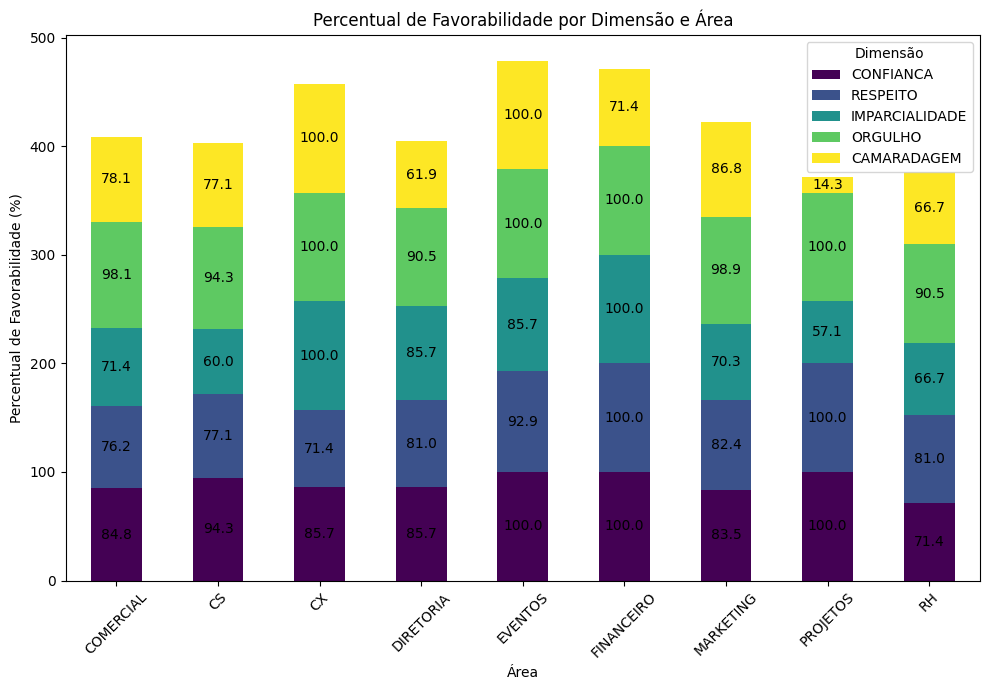

In [34]:
# Converter o dicionário de favorabilidade em um DataFrame
df_favorabilidade = pd.DataFrame(favorabilidade_por_area).T

# Plotar o gráfico
ax = df_favorabilidade.plot(kind='bar', stacked=True, figsize=(10, 7), colormap="viridis")
plt.title('Percentual de Favorabilidade por Dimensão e Área')
plt.xlabel('Área')
plt.ylabel('Percentual de Favorabilidade (%)')
plt.legend(title='Dimensão')
plt.xticks(rotation=45)

# Adicionar rótulos nas barras
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f', label_type='center')  # Rótulos no centro das barras

plt.tight_layout()  # Ajustar o layout para melhor visualização
plt.show()
plt.show()